In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

In [3]:
mouse_clinical_merge = pd.merge(clinical_trial_data, mouse_drug_data, on="Mouse ID", how="outer")
mouse_clinical_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [4]:
mean_tumor_volume = mouse_clinical_merge.groupby(['Drug','Timepoint']).mean().reset_index()
mean_tumor_volume = mean_tumor_volume.drop('Metastatic Sites',axis=1)
mean_tumor_volume_df = pd.DataFrame(mean_tumor_volume)
mean_tumor_volume_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [5]:
stderr_tumor_volume = mouse_clinical_merge.groupby(['Drug','Timepoint']).sem().reset_index()
stderr_tumor_volume = stderr_tumor_volume.drop(['Metastatic Sites','Mouse ID'],axis=1)
stderr_tumor_volume_df = pd.DataFrame(stderr_tumor_volume)
stderr_tumor_volume_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [6]:
mean_tumor_volume_df_reshape = mean_tumor_volume_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
stderr_tumor_volume_df_reshape = stderr_tumor_volume_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

print(mean_tumor_volume_df_reshape)
print(stderr_tumor_volume_df_reshape.head())

Drug       Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol    Placebo  \
Timepoint                                                                     
0          45.000000  45.000000  45.000000  45.000000  45.000000  45.000000   
5          44.266086  46.503051  47.062001  47.389175  46.796098  47.125589   
10         43.084291  48.285125  49.403909  49.582269  48.694210  49.423329   
15         42.064317  50.094055  51.296397  52.399974  50.933018  51.359742   
20         40.716325  52.157049  53.197691  54.920935  53.644087  54.364417   
25         39.939528  54.287674  55.715252  57.678982  56.731968  57.482574   
30         38.769339  56.769517  58.299397  60.994507  59.559509  59.809063   
35         37.816839  58.827548  60.742461  63.371686  62.685087  62.420615   
40         36.958001  61.467895  63.162824  66.068580  65.600754  65.052675   
45         36.236114  64.132421  65.755562  70.662958  69.265506  68.084082   

Drug        Propriva   Ramicane   Stelasyn  Zonifer

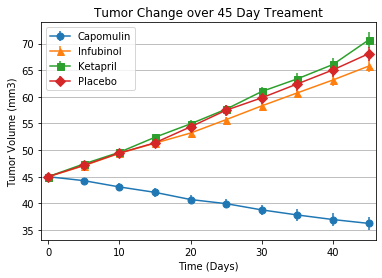

In [7]:
fig, ax1 = plt.subplots()

ax1 = mean_tumor_volume_df_reshape.loc[:,'Capomulin'].plot(figsize=(6,4), yerr = stderr_tumor_volume_df_reshape, marker="o", markersize=7, legend = False)
ax1 = mean_tumor_volume_df_reshape.loc[:,'Infubinol'].plot(figsize=(6,4), yerr = stderr_tumor_volume_df_reshape, marker="^", markersize=7, legend = False)
ax1 = mean_tumor_volume_df_reshape.loc[:,'Ketapril'].plot(figsize=(6,4), yerr = stderr_tumor_volume_df_reshape, marker="s", markersize=7, legend = False)
ax1 = mean_tumor_volume_df_reshape.loc[:,'Placebo'].plot(figsize=(6,4), yerr = stderr_tumor_volume_df_reshape, marker="D", markersize=7, legend = False)

ax1.set_xlim(-1, max(mean_tumor_volume_df['Timepoint']) + 1)

ax1.set_xlabel("Time (Days)")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.set_title("Tumor Change over 45 Day Treament")
ax1.grid(which='major', axis='y')
ax1.legend(loc = 'best')

plt.savefig('tumorchange.png')

In [8]:
mean_met_site = mouse_clinical_merge.groupby(['Drug','Timepoint']).mean().reset_index()
mean_met_site = mean_met_site.drop('Tumor Volume (mm3)',axis=1)
mean_met_site_df = pd.DataFrame(mean_met_site)
mean_met_site_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [9]:
stderr_met_site = mouse_clinical_merge.groupby(['Drug','Timepoint']).sem().reset_index()
stderr_met_site = stderr_met_site.drop(['Tumor Volume (mm3)','Mouse ID'],axis=1)
stderr_met_site_df = pd.DataFrame(stderr_met_site)
stderr_met_site_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [10]:
mean_met_site_df_reshape = mean_met_site_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
mean_met_site_df_reshape.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [11]:
stderr_met_site_df_reshape = stderr_met_site_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
stderr_met_site_df_reshape.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


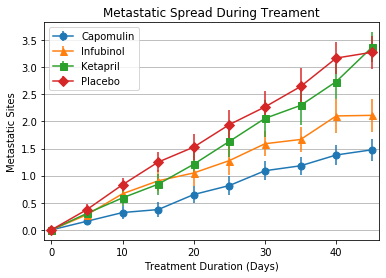

In [12]:
fig, ax2 = plt.subplots()

ax2 = mean_met_site_df_reshape.loc[:,'Capomulin'].plot(figsize=(6,4), yerr = stderr_met_site_df_reshape, marker='o', markersize = 7, legend = False)
ax2 = mean_met_site_df_reshape.loc[:,'Infubinol'].plot(figsize=(6,4), yerr = stderr_met_site_df_reshape, marker='^', markersize = 7, legend = False)
ax2 = mean_met_site_df_reshape.loc[:,'Ketapril'].plot(figsize=(6,4), yerr = stderr_met_site_df_reshape, marker='s', markersize = 7, legend = False)
ax2 = mean_met_site_df_reshape.loc[:,'Placebo'].plot(figsize=(6,4), yerr = stderr_met_site_df_reshape, marker='D', markersize = 7, legend = False)

ax2.set_xlim(-1, max(mean_met_site_df['Timepoint']) + 1)

ax2.set_xlabel("Treatment Duration (Days)")
ax2.set_ylabel("Metastatic Sites")
ax2.set_title("Metastatic Spread During Treament")
ax2.grid(which='major', axis='y')
ax2.legend(loc = 'best')

plt.savefig('spreadchange.png')

In [13]:
mice_count = mouse_clinical_merge.groupby(['Drug','Timepoint']).agg({'Mouse ID': 'nunique'}).reset_index()

mice_count_df = pd.DataFrame(mice_count)
mice_count_df.rename(columns = {'Mouse ID':'Mouse Count'}, inplace = True)

mice_count_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [14]:
mice_count_df_reshape = mice_count_df.pivot(index='Timepoint', columns='Drug', values='Mouse Count')

mice_count_df_reshape.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


In [15]:
mice_count_pct = mice_count_df_reshape
mice_count_pct['Capomulin'] = mice_count_pct['Capomulin']/max(mice_count_pct['Capomulin']) * 100
mice_count_pct['Ceftamin'] = mice_count_pct['Ceftamin']/max(mice_count_pct['Ceftamin']) * 100
mice_count_pct['Infubinol'] = mice_count_pct['Infubinol']/max(mice_count_pct['Infubinol']) * 100
mice_count_pct['Ketapril'] = mice_count_pct['Ketapril']/max(mice_count_pct['Ketapril']) * 100
mice_count_pct['Naftisol'] = mice_count_pct['Naftisol']/max(mice_count_pct['Naftisol']) * 100
mice_count_pct['Placebo'] = mice_count_pct['Placebo']/max(mice_count_pct['Placebo']) * 100
mice_count_pct['Propriva'] = mice_count_pct['Propriva']/max(mice_count_pct['Propriva']) * 100
mice_count_pct['Ramicane'] = mice_count_pct['Ramicane']/max(mice_count_pct['Ramicane']) * 100
mice_count_pct['Stelasyn'] = mice_count_pct['Stelasyn']/max(mice_count_pct['Stelasyn']) * 100
mice_count_pct['Zoniferol'] = mice_count_pct['Zoniferol']/max(mice_count_pct['Zoniferol']) * 100
mice_count_pct_df = pd.DataFrame(mice_count_pct)

mice_count_pct_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.0,100.0,96.0,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.0,96.0,88.0,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,64.0,96.0,88.0,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,64.0,92.0,80.0,68.0


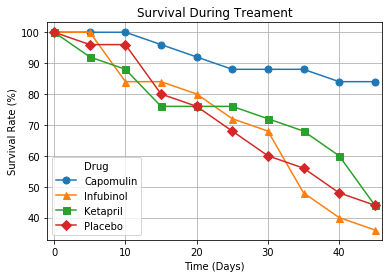

In [16]:
fig, ax3 = plt.subplots()

mice_count_pct_df.loc[:,['Capomulin','Infubinol','Ketapril','Placebo']].plot(figsize=(6,4), style=['o-', '^-', 's-', 'D-'], markersize=7, ax = ax3)

ax3.set_xlim(-1, max(mice_count_df['Timepoint']) + 1)

ax3.set_xlabel("Time (Days)")
ax3.set_ylabel("Survival Rate (%)")
ax3.set_title("Survival During Treament")
ax3.grid(which='major')

plt.savefig('micesurvival.png')

In [17]:
change_drug = mean_tumor_volume_df_reshape.diff(periods=len(mean_tumor_volume_df_reshape)-1) / 45 * 100
change_drug_pct = change_drug.dropna()

change_drug_pct

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
45,-19.475303,42.516492,46.123472,57.028795,53.923347,51.29796,47.241175,-22.3209,52.085134,46.579751


In [18]:
for row in change_drug_pct.itertuples(index=False, name=None):
    change_drug_pct_tuple = row

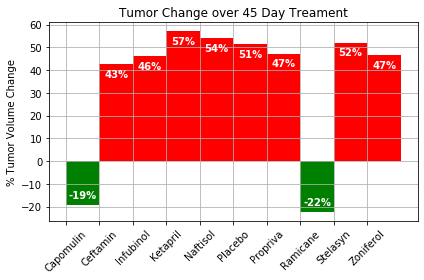

<Figure size 576x288 with 0 Axes>

In [22]:
fig, ax4 = plt.subplots()
plt.figure(figsize=(8, 4))

colors = []
for result in change_drug_pct_tuple:
    if result >= 0:
        colors.append('r')
    else:
        colors.append('g')
        
drugs = change_drug_pct.columns.values


ax4.bar(drugs, change_drug_pct_tuple, color = colors, width = 1, align = 'edge')

ax4.set_xticklabels(drugs, rotation=45, horizontalalignment='center')
ax4.set_ylabel("% Tumor Volume Change")
ax4.set_title("Tumor Change over 45 Day Treament")
ax4.grid(which='major')

rects = ax4.patches

def autolabel(rects, xpos='center'): 
    # found this coding at https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/barchart.html
    
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        if height < 0:
            va = 'bottom'
            ypos = 5
        else:
            va = 'top'
            ypos = -5
        ax4.annotate('{:.0f}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos], ypos),  
                    textcoords="offset points",  
                    ha=ha[xpos], va=va, color = "white", weight = 'bold')


autolabel(rects)

fig.tight_layout()

plt.savefig('drugimpact.png')
